# 데이터처리언어_10주차 과제_21510004 이예빈

## 내가 입력한 동과 가장 유사한 인구 구조를 가지고 있는 top 5 동의 인구 구조 도식화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
df.head()

,총인구수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,7세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),9857426,9857426,61253,70532,74322,72482,71688,78941,75386,75929,...,5892,4695,3589,3501,2569,1851,1436,1010,736,5519
서울특별시 종로구 (1111000000),154770,154770,652,794,911,895,859,1046,909,1012,...,149,115,95,79,81,60,46,37,26,226
서울특별시 종로구 청운효자동(1111051500),13272,13272,81,82,90,105,97,116,117,116,...,12,14,7,7,8,3,5,1,1,17
서울특별시 종로구 사직동(1111053000),9441,9441,43,63,75,68,76,81,74,83,...,11,13,7,5,7,3,6,4,4,17
서울특별시 종로구 삼청동(1111054000),2907,2907,12,4,22,13,12,13,20,11,...,5,2,3,3,2,2,0,2,1,7


In [3]:
# 연령별 인구수를 총인구수로 나누어 비율로 표현
df = df.div(df['총인구수'], axis=0)

#'총인구수', '연령구간인구수' 열 삭제
del df['총인구수'], df['연령구간인구수']
df.head()

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),0.006214,0.007155,0.007540,0.007353,0.007272,0.008008,0.007648,0.007703,0.007281,0.007726,...,0.000598,0.000476,0.000364,0.000355,0.000261,0.000188,0.000146,0.000102,0.000075,0.000560
서울특별시 종로구 (1111000000),0.004213,0.005130,0.005886,0.005783,0.005550,0.006758,0.005873,0.006539,0.005938,0.006500,...,0.000963,0.000743,0.000614,0.000510,0.000523,0.000388,0.000297,0.000239,0.000168,0.001460
서울특별시 종로구 청운효자동(1111051500),0.006103,0.006178,0.006781,0.007911,0.007309,0.008740,0.008816,0.008740,0.007685,0.008966,...,0.000904,0.001055,0.000527,0.000527,0.000603,0.000226,0.000377,0.000075,0.000075,0.001281
서울특별시 종로구 사직동(1111053000),0.004555,0.006673,0.007944,0.007203,0.008050,0.008580,0.007838,0.008791,0.006991,0.009215,...,0.001165,0.001377,0.000741,0.000530,0.000741,0.000318,0.000636,0.000424,0.000424,0.001801
서울특별시 종로구 삼청동(1111054000),0.004128,0.001376,0.007568,0.004472,0.004128,0.004472,0.006880,0.003784,0.007224,0.007224,...,0.001720,0.000688,0.001032,0.001032,0.000688,0.000688,0.000000,0.000688,0.000344,0.002408


In [4]:
#원하는 지역 입력 받기
name = input('원하는 지역의 이름을 입력해주세요: ')

#입력 받은 지역 행을 df형태로 저장
a = df.index.str.contains(name)
df2 = df[a]
df2

원하는 지역의 이름을 입력해주세요: 별내면


,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
경기도 남양주시 별내면(4136031000),0.004568,0.006395,0.006828,0.006587,0.007837,0.00827,0.008799,0.008847,0.008847,0.009809,...,0.000577,0.00024,0.000337,0.000337,0.000337,0.000385,0.000048,0.000144,0.000192,0.000673


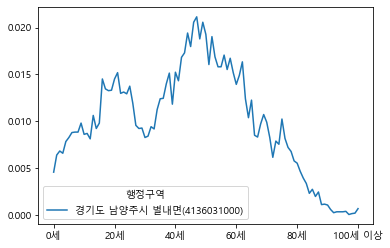

In [5]:
#도식화
plt.rc('font', family = 'Malgun Gothic')
df2.T.plot()
plt.show()

In [6]:
#입력 받은 지역과 유사한 인구구조를 가지고 있는 지역 추출
x = df.sub(df2.iloc[0], axis=1) #입력 받은 지역과 인구비율 차이
y = np.power(x, 2) #차이의 제곱
z = y.sum(axis=1) #차이의 제곱합

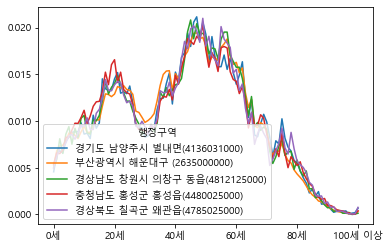

In [7]:
#제곱합이 가장 작은 순으로 정렬 후 상위 5개 추출, 도식화
i = z.sort_values().index[:5] 
df.loc[i].T.plot()
plt.show()